In [133]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [2]:
## load data on ghg data
biking_2013 = pd.read_csv("201306-citibike-tripdata.csv")
biking_2013 = biking_2013.rename(columns={"birth year":"birthyear"})
biking_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [3]:
biking_2016 = pd.read_csv("201606-citibike-tripdata.csv")
biking_2016 = biking_2016.rename(columns={"birth year":"birthyear"})
biking_2016.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [4]:
routes = pd.read_csv("bicycle-routes-1.csv")
routes.head()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/2008 12:00:00 AM +0000,09/25/2008 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/1980 12:00:00 AM +0000,07/01/1980 12:00:00 AM +0000,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/2006 12:00:00 AM +0000,07/01/2017 12:00:00 AM +0000,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/2012 12:00:00 AM +0000,09/12/2012 12:00:00 AM +0000,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,NaN,Standard,43043.0,0.000748


In [5]:
len(biking_2016)

1460318

In [6]:
len(biking_2013)

577703

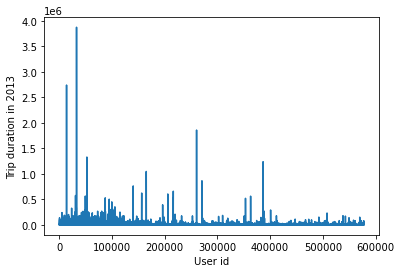

In [7]:
plt.plot(biking_2013["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2013")
plt.show()

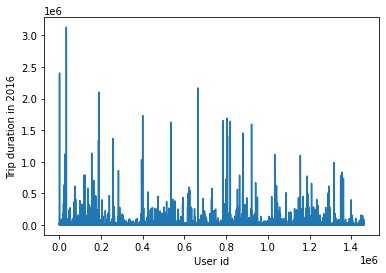

In [8]:
plt.plot(biking_2016["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2016")
plt.show()

In [9]:
num_subscribers_2013 = biking_2013.query("usertype == 'Subscriber'")
len(num_subscribers_2013)

337384

In [10]:
num_subscribers_2016 = biking_2016.query("usertype == 'Subscriber'")
len(num_subscribers_2016)

1303486

In [11]:
percent_subscribers_2013 = len(num_subscribers_2013) / len(biking_2013)
print("The percent of subscribers in 2013 is " + "{:.2%}".format(percent_subscribers_2013))

The percent of subscribers in 2013 is 58.40%


In [12]:
percent_subscribers_2016 = len(num_subscribers_2016) / len(biking_2016)
print("The percent of subscribers in 2016 is " + "{:.2%}".format(percent_subscribers_2016))

The percent of subscribers in 2016 is 89.26%


In [13]:
##Percent change in subscribers from 2013 to 2019
percent_change = (len(num_subscribers_2016) - len(num_subscribers_2013) ) / len(num_subscribers_2013)
print("The percent of change of subscribers from 2013 to 2016 is " + "{:.2%}".format(percent_change))

The percent of change of subscribers from 2013 to 2016 is 286.35%


In [21]:
biking_2013_subset["tripduration"].max()

73961

In [24]:
biking_2013_subset = biking_2013.query('birthyear > 1920 & gender > 0 & tripduration < 60000')
biking_2013_subset = biking_2013_subset.sample(n=1000, random_state=1)
biking_2013_subset = biking_2013_subset.reset_index(level=0)
biking_2013_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,293204,936,2013-06-20 17:34:19,2013-06-20 17:49:55,151,Cleveland Pl & Spring St,40.722104,-73.997249,402.0,Broadway & E 22 St,40.740343,-73.989551,15610,Subscriber,1981.0,2
1,299950,349,2013-06-20 20:06:31,2013-06-20 20:12:20,435,W 21 St & 6 Ave,40.741740,-73.994156,459.0,W 20 St & 11 Ave,40.746745,-74.007756,14611,Subscriber,1962.0,1
2,449621,1002,2013-06-26 11:14:51,2013-06-26 11:31:33,330,Reade St & Broadway,40.714505,-74.005628,330.0,Reade St & Broadway,40.714505,-74.005628,15378,Subscriber,1957.0,1
3,467913,1077,2013-06-26 21:03:11,2013-06-26 21:21:08,327,Vesey Pl & River Terrace,40.715338,-74.016584,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,17497,Subscriber,1982.0,1
4,371314,317,2013-06-23 13:34:14,2013-06-23 13:39:31,489,10 Ave & W 28 St,40.750664,-74.001768,441.0,E 52 St & 2 Ave,40.756014,-73.967416,17213,Subscriber,1944.0,2


In [25]:
biking_2016_subset = biking_2016.query('birthyear > 1920 & gender > 0 & tripduration < 60000')
biking_2016_subset = biking_2016_subset.sample(n=1000, random_state=1)
biking_2016_subset = biking_2016_subset.reset_index(level=0)
biking_2016_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1048327,1103,6/22/2016 18:53:53,6/22/2016 19:12:16,513,W 56 St & 10 Ave,40.768254,-73.988639,494,W 26 St & 8 Ave,40.747348,-73.997236,21245,Subscriber,1983.0,2
1,59908,451,6/2/2016 07:54:58,6/2/2016 08:02:30,3122,48 Ave & 5 St,40.744363,-73.955873,3126,44 Dr & Jackson Ave,40.747182,-73.943264,17648,Subscriber,1983.0,2
2,97765,559,6/2/2016 18:49:19,6/2/2016 18:58:39,434,9 Ave & W 18 St,40.743174,-74.003664,345,W 13 St & 6 Ave,40.736494,-73.997044,20177,Subscriber,1988.0,1
3,947825,316,6/20/2016 21:10:31,6/20/2016 21:15:48,388,W 26 St & 10 Ave,40.749718,-74.002950,434,9 Ave & W 18 St,40.743174,-74.003664,16844,Subscriber,1968.0,1
4,805364,521,6/18/2016 00:44:11,6/18/2016 00:52:52,2003,1 Ave & E 18 St,40.733812,-73.980544,454,E 51 St & 1 Ave,40.754557,-73.965930,19623,Subscriber,1989.0,1


In [26]:
routes_subset = routes.sample(n=1000, random_state=1)
routes_subset = routes_subset.reset_index(level=0)
routes_subset.head()

,index,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,7356,BEACH 193 ST,STATE RD,4,MULTILINESTRING ((-73.90225363399998 40.562189...,BEACH 169 ST,ON,II,05/01/1997 12:00:00 AM +0000,05/01/1997 12:00:00 AM +0000,NaN,R,1,Curbside,NaN,149081.0,0.000068
1,9269,32 AVE,101 ST,4,MULTILINESTRING ((-73.86824140499994 40.761723...,ASTORIA BLVD,ON,II,10/14/2016 12:00:00 AM +0000,10/14/2016 12:00:00 AM +0000,NaN,L,1,NaN,Standard,177415.0,0.000619
2,12243,E 125 ST,2 AV,1,MULTILINESTRING ((-73.93411419099994 40.802046...,E 104 ST,ON,I,10/26/2012 12:00:00 AM +0000,10/26/2012 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,110979.0,0.000060
3,9482,SUNNYSIDE AV,VERMONT ST,3,MULTILINESTRING ((-73.89597729299999 40.680112...,COZINE AV,ON,III,10/01/2009 12:00:00 AM +0000,10/01/2009 12:00:00 AM +0000,NaN,L,1,NaN,Sharrows,47593.0,0.001175
4,13586,GARRISON AVE,HUNTS PT AV,2,MULTILINESTRING ((-73.88838357299994 40.817305...,SPOFFORD AVE,ON,II,11/01/2011 12:00:00 AM +0000,11/01/2011 12:00:00 AM +0000,NaN,2,2,Standard,Standard,9002144.0,0.000059


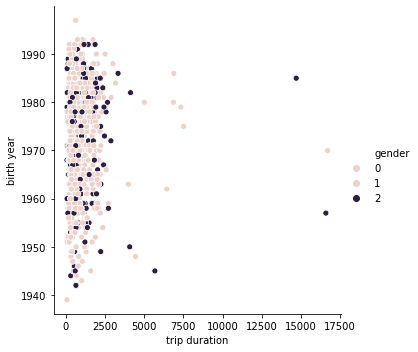

In [27]:
sns.relplot(x="tripduration", y="birthyear", hue="gender", data=biking_2013_subset)
plt.xlabel("trip duration")
plt.ylabel("birth year")
plt.show()

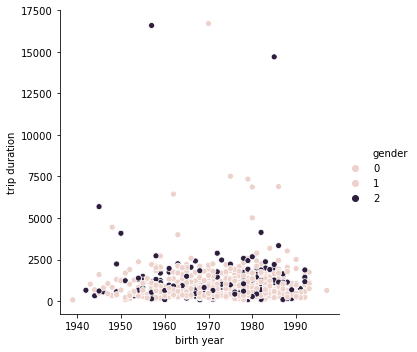

In [28]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2013_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()

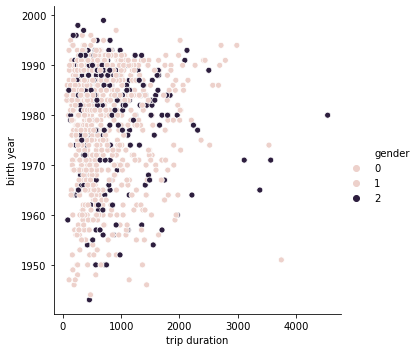

In [29]:
sns.relplot(x="tripduration", y="birthyear", hue="gender", data=biking_2016_subset)
plt.xlabel("trip duration")
plt.ylabel("birth year")
plt.show()

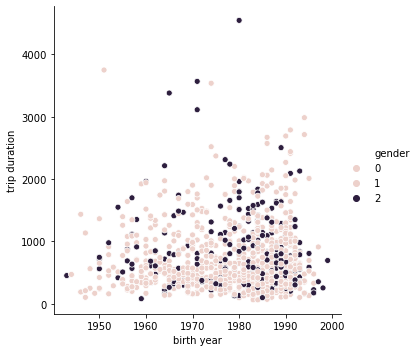

In [30]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2016_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()

In [31]:
## Edit the longitude and latitude to two decimal places
for x in range(len(biking_2016_subset)):
    biking_2016_subset["start station latitude"][x] = round(biking_2016_subset["start station latitude"][x],2)
    biking_2016_subset["start station longitude"][x] = round(biking_2016_subset["start station longitude"][x],2)
biking_2016_subset.head()

<ipython-input-31-36810c0d1a17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biking_2016_subset["start station latitude"][x] = round(biking_2016_subset["start station latitude"][x],2)
<ipython-input-31-36810c0d1a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biking_2016_subset["start station longitude"][x] = round(biking_2016_subset["start station longitude"][x],2)


,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1048327,1103,6/22/2016 18:53:53,6/22/2016 19:12:16,513,W 56 St & 10 Ave,40.77,-73.99,494,W 26 St & 8 Ave,40.747348,-73.997236,21245,Subscriber,1983.0,2
1,59908,451,6/2/2016 07:54:58,6/2/2016 08:02:30,3122,48 Ave & 5 St,40.74,-73.96,3126,44 Dr & Jackson Ave,40.747182,-73.943264,17648,Subscriber,1983.0,2
2,97765,559,6/2/2016 18:49:19,6/2/2016 18:58:39,434,9 Ave & W 18 St,40.74,-74.00,345,W 13 St & 6 Ave,40.736494,-73.997044,20177,Subscriber,1988.0,1
3,947825,316,6/20/2016 21:10:31,6/20/2016 21:15:48,388,W 26 St & 10 Ave,40.75,-74.00,434,9 Ave & W 18 St,40.743174,-74.003664,16844,Subscriber,1968.0,1
4,805364,521,6/18/2016 00:44:11,6/18/2016 00:52:52,2003,1 Ave & E 18 St,40.73,-73.98,454,E 51 St & 1 Ave,40.754557,-73.965930,19623,Subscriber,1989.0,1


In [32]:
for x in range(len(biking_2013_subset)):
    biking_2013_subset["start station latitude"][x] = round(biking_2013_subset["start station latitude"][x],2)
    biking_2013_subset["start station longitude"][x] = round(biking_2013_subset["start station longitude"][x],2)
biking_2013_subset.head()

<ipython-input-32-a74393b0deba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biking_2013_subset["start station latitude"][x] = round(biking_2013_subset["start station latitude"][x],2)
<ipython-input-32-a74393b0deba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biking_2013_subset["start station longitude"][x] = round(biking_2013_subset["start station longitude"][x],2)


,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,293204,936,2013-06-20 17:34:19,2013-06-20 17:49:55,151,Cleveland Pl & Spring St,40.72,-74.00,402.0,Broadway & E 22 St,40.740343,-73.989551,15610,Subscriber,1981.0,2
1,299950,349,2013-06-20 20:06:31,2013-06-20 20:12:20,435,W 21 St & 6 Ave,40.74,-73.99,459.0,W 20 St & 11 Ave,40.746745,-74.007756,14611,Subscriber,1962.0,1
2,449621,1002,2013-06-26 11:14:51,2013-06-26 11:31:33,330,Reade St & Broadway,40.71,-74.01,330.0,Reade St & Broadway,40.714505,-74.005628,15378,Subscriber,1957.0,1
3,467913,1077,2013-06-26 21:03:11,2013-06-26 21:21:08,327,Vesey Pl & River Terrace,40.72,-74.02,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,17497,Subscriber,1982.0,1
4,371314,317,2013-06-23 13:34:14,2013-06-23 13:39:31,489,10 Ave & W 28 St,40.75,-74.00,441.0,E 52 St & 2 Ave,40.756014,-73.967416,17213,Subscriber,1944.0,2


In [33]:
print(routes_subset["the_geom"][0])

MULTILINESTRING ((-73.90225363399998 40.56218937300008, -73.90231957199995 40.562170853000055))


In [34]:
routes_subset["latitude"] = pd.DataFrame(np.zeros(len(routes_subset)))

In [35]:
routes_subset["longitude"] = pd.DataFrame(np.zeros(len(routes_subset)))

In [36]:
for x in range(len(routes_subset)):
    routes_subset["longitude"][x] = float(routes_subset["the_geom"][x][18:24])
    routes_subset["latitude"][x] = float(routes_subset["the_geom"][x][37:42])
routes_subset.head()                       

<ipython-input-36-cbb1a64bbb9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_subset["longitude"][x] = float(routes_subset["the_geom"][x][18:24])
<ipython-input-36-cbb1a64bbb9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_subset["latitude"][x] = float(routes_subset["the_geom"][x][37:42])


,index,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng,latitude,longitude
0,7356,BEACH 193 ST,STATE RD,4,MULTILINESTRING ((-73.90225363399998 40.562189...,BEACH 169 ST,ON,II,05/01/1997 12:00:00 AM +0000,05/01/1997 12:00:00 AM +0000,NaN,R,1,Curbside,NaN,149081.0,0.000068,40.56,-73.90
1,9269,32 AVE,101 ST,4,MULTILINESTRING ((-73.86824140499994 40.761723...,ASTORIA BLVD,ON,II,10/14/2016 12:00:00 AM +0000,10/14/2016 12:00:00 AM +0000,NaN,L,1,NaN,Standard,177415.0,0.000619,40.76,-73.86
2,12243,E 125 ST,2 AV,1,MULTILINESTRING ((-73.93411419099994 40.802046...,E 104 ST,ON,I,10/26/2012 12:00:00 AM +0000,10/26/2012 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,110979.0,0.000060,40.80,-73.93
3,9482,SUNNYSIDE AV,VERMONT ST,3,MULTILINESTRING ((-73.89597729299999 40.680112...,COZINE AV,ON,III,10/01/2009 12:00:00 AM +0000,10/01/2009 12:00:00 AM +0000,NaN,L,1,NaN,Sharrows,47593.0,0.001175,40.68,-73.89
4,13586,GARRISON AVE,HUNTS PT AV,2,MULTILINESTRING ((-73.88838357299994 40.817305...,SPOFFORD AVE,ON,II,11/01/2011 12:00:00 AM +0000,11/01/2011 12:00:00 AM +0000,NaN,2,2,Standard,Standard,9002144.0,0.000059,40.81,-73.88


In [37]:
routes_subset = routes_subset[["boro", "latitude", "longitude"]]
routes_subset.head()

,boro,latitude,longitude
0,4,40.56,-73.90
1,4,40.76,-73.86
2,1,40.80,-73.93
3,3,40.68,-73.89
4,2,40.81,-73.88


In [38]:
routes_subset.rename(columns={'latitude':'start station latitude', 'longitude':'start station longitude'}, inplace=True)
routes_subset.head()

,boro,start station latitude,start station longitude
0,4,40.56,-73.90
1,4,40.76,-73.86
2,1,40.80,-73.93
3,3,40.68,-73.89
4,2,40.81,-73.88


In [39]:
biking_2013_routes = pd.merge(routes_subset, biking_2013_subset, how="right", on=["start station latitude","start station longitude"])

In [41]:
biking_2013_routes.head()

,boro,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1
1,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1
2,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1
3,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1
4,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1


In [42]:
biking_2013_routes = biking_2013_routes.drop_duplicates()
biking_2013_routes.head()

,boro,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.72,-73.98,43818,6865,2013-06-04 18:46:26,2013-06-04 20:40:51,356,Bialystoker Pl & Delancey St,NaN,NaN,NaN,NaN,18408,Subscriber,1980.0,1
8,1.0,40.72,-73.98,416821,663,2013-06-25 08:23:45,2013-06-25 08:34:48,393,E 5 St & Avenue C,293.0,Lafayette St & E 8 St,40.730207,-73.991026,16733,Subscriber,1957.0,2
16,1.0,40.72,-73.98,305402,1452,2013-06-21 07:00:30,2013-06-21 07:24:42,349,Rivington St & Ridge St,522.0,E 51 St & Lexington Ave,40.757148,-73.972078,19616,Subscriber,1987.0,2
24,1.0,40.72,-73.98,525696,719,2013-06-29 09:27:43,2013-06-29 09:39:42,349,Rivington St & Ridge St,369.0,Washington Pl & 6 Ave,40.732241,-74.000264,17302,Subscriber,1982.0,1
32,1.0,40.72,-73.98,290404,561,2013-06-20 16:08:52,2013-06-20 16:18:13,411,E 6 St & Avenue D,502.0,Henry St & Grand St,40.714215,-73.981346,17235,Subscriber,1964.0,2


In [43]:
biking_2013_routes.shape[0]

1002

In [44]:
biking_2013_routes = biking_2013_routes.dropna()

In [45]:
biking_2013_routes.shape[0]

797

In [46]:
biking_2013_routes.rename(columns={'boro':'Zone'}, inplace=True)
biking_2013_routes.head(0)

,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender


In [140]:
biking_2016_routes = pd.merge(routes_subset, biking_2016_subset, how="right", on=["start station latitude","start station longitude"])

In [141]:
biking_2016_routes.head()

,boro,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.75,-73.99,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
1,1.0,40.75,-73.99,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
2,1.0,40.75,-73.99,742387,184,6/16/2016 19:32:46,6/16/2016 19:35:50,492,W 33 St & 7 Ave,446,W 24 St & 7 Ave,40.744876,-73.995299,15870,Subscriber,1969.0,1
3,1.0,40.75,-73.99,742387,184,6/16/2016 19:32:46,6/16/2016 19:35:50,492,W 33 St & 7 Ave,446,W 24 St & 7 Ave,40.744876,-73.995299,15870,Subscriber,1969.0,1
4,1.0,40.75,-73.99,1363324,918,6/29/2016 09:27:01,6/29/2016 09:42:20,533,Broadway & W 39 St,168,W 18 St & 6 Ave,40.739713,-73.994564,20817,Subscriber,1988.0,2


In [142]:
biking_2016_routes = biking_2016_routes.drop_duplicates()
biking_2016_routes.head()

,boro,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.75,-73.99,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
2,1.0,40.75,-73.99,742387,184,6/16/2016 19:32:46,6/16/2016 19:35:50,492,W 33 St & 7 Ave,446,W 24 St & 7 Ave,40.744876,-73.995299,15870,Subscriber,1969.0,1
4,1.0,40.75,-73.99,1363324,918,6/29/2016 09:27:01,6/29/2016 09:42:20,533,Broadway & W 39 St,168,W 18 St & 6 Ave,40.739713,-73.994564,20817,Subscriber,1988.0,2
6,1.0,40.75,-73.99,583701,614,6/13/2016 18:39:02,6/13/2016 18:49:17,379,W 31 St & 7 Ave,475,E 16 St & Irving Pl,40.735243,-73.987586,19640,Subscriber,1970.0,1
8,1.0,40.75,-73.99,1320796,236,6/28/2016 13:19:09,6/28/2016 13:23:05,533,Broadway & W 39 St,498,Broadway & W 32 St,40.748549,-73.988084,16735,Subscriber,1960.0,1


In [143]:
biking_2016_routes = biking_2016_routes.dropna()

In [144]:
biking_2016_routes.rename(columns={'boro':'Zone'}, inplace=True)
biking_2016_routes.head(0)

,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender


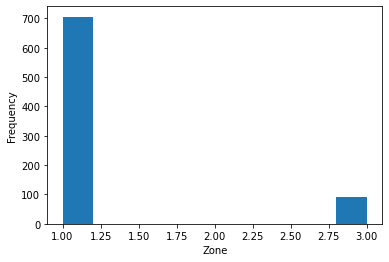

In [50]:
plt.hist(biking_2013_routes["Zone"])
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.show()

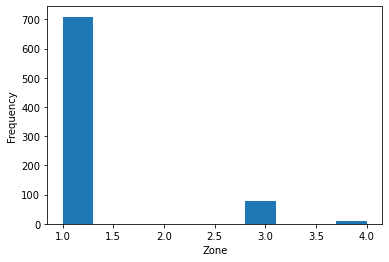

In [145]:
plt.hist(biking_2016_routes["Zone"])
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.show()

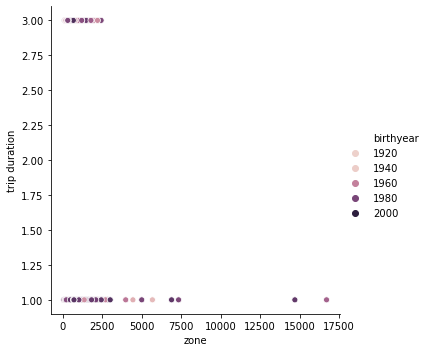

In [52]:
sns.relplot(x="tripduration", y="Zone", hue="birthyear", data=biking_2013_routes)
plt.xlabel("zone")
plt.ylabel("trip duration")
plt.show()

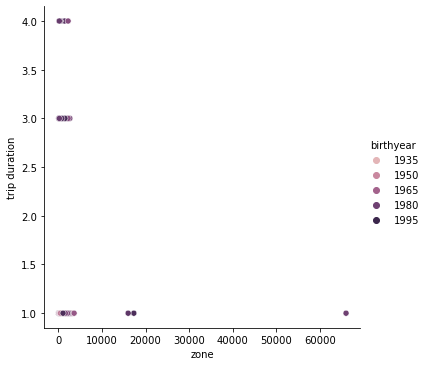

In [146]:
sns.relplot(x="tripduration", y="Zone", hue="birthyear", data=biking_2016_routes)
plt.xlabel("zone")
plt.ylabel("trip duration")
plt.show()

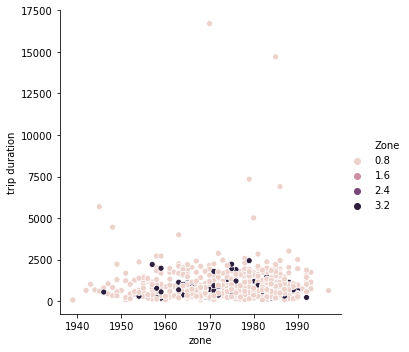

In [53]:
sns.relplot(x="birthyear", y="tripduration", hue="Zone", data=biking_2013_routes)
plt.xlabel("zone")
plt.ylabel("trip duration")
plt.show()

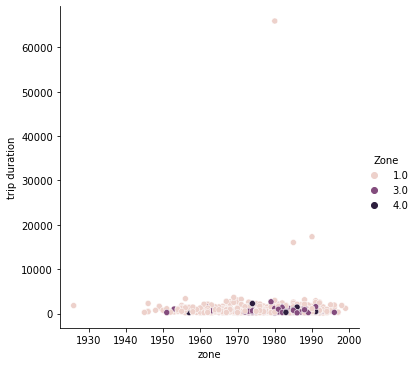

In [147]:
sns.relplot(x="birthyear", y="tripduration", hue="Zone", data=biking_2016_routes)
plt.xlabel("zone")
plt.ylabel("trip duration")
plt.show()

In [54]:
recycling_2010 = pd.read_csv('recycling_2010.csv')
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [55]:
recycling_2016 = pd.read_csv('recycling_2016.csv')
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [56]:
zone_map = {"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4 , "Staten Island":5}
w = recycling_2010['Zone'].map(zone_map)
recycling_2010['Zone'] = w
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,1,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,1,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,1,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,1,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,1,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [162]:
zone_map = {"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4 , "Staten Island":5}
t = recycling_2016['Zone'].map(zone_map)
recycling_2016['Zone'] = t
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,3,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,3,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,3,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,3,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,3,BKN05,1,2016,July,9.1,23.5,33.0,27.9


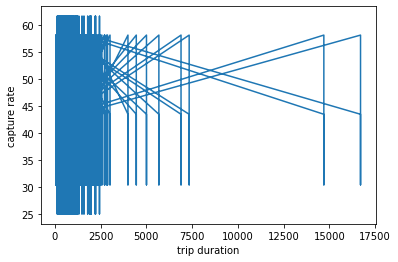

In [72]:
plt.plot(biking_2013_recycle["tripduration"], biking_2013_recycle["Capture Rate"] )
plt.xlabel("trip duration")
plt.ylabel("capture rate")
plt.show()

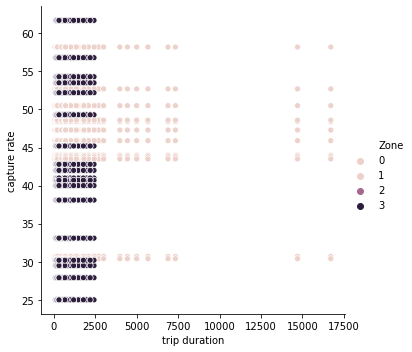

In [73]:
sns.relplot(x="tripduration", y="Capture Rate", hue="Zone", data=biking_2013_recycle)
plt.xlabel("trip duration")
plt.ylabel("capture rate")
plt.show()

In [119]:
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)
bootstrap_intercepts = np.zeros(n_bootstrap)
bootstrap_corr = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    fake_data = biking_2013_routes.sample(n=len(recycling_2010), replace=True)
    fake_model = LinearRegression().fit(fake_data[["tripduration"]], recycling_2010[["Diversion Rate"]])
    bootstrap_slopes[i] = fake_model.coef_
    bootstrap_intercepts[i] = fake_model.intercept_
    bootstrap_corr[i] = fake_model.score(fake_data[["tripduration"]],  recycling_2010[["Diversion Rate"]])

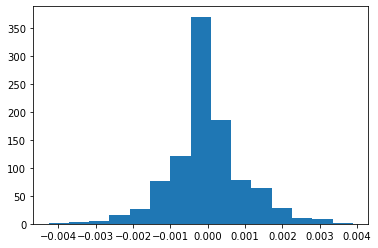

In [124]:
plt.hist(bootstrap_slopes, bins=15)
plt.show()

In [136]:
slope_average = bootstrap_slopes.mean()
slope_average

-1.1673344727802952e-05

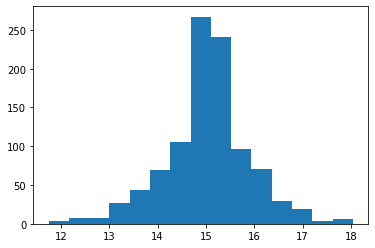

In [126]:
plt.hist(bootstrap_intercepts, bins=15)
plt.show()

In [138]:
intercept_average = bootstrap_slopes.mean()
intercept_average

-1.1673344727802952e-05

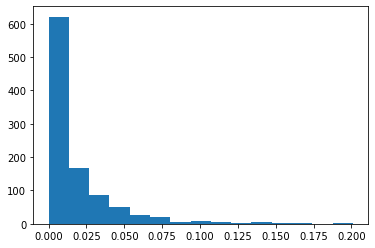

In [127]:
plt.hist(bootstrap_corr, bins=15)
plt.show()

In [139]:
corr_average = bootstrap_corr.mean()
corr_average

0.01747722048928231

In [150]:
bootstrap_slopes_16 = np.zeros(n_bootstrap)
bootstrap_intercepts_16 = np.zeros(n_bootstrap)
bootstrap_corr_16 = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    fake_data_16 = biking_2016_routes.sample(n=len(recycling_2016), replace=True)
    fake_model_16 = LinearRegression().fit(fake_data_16[["tripduration"]], recycling_2016[["Diversion Rate"]])
    bootstrap_slopes_16[i] = fake_model_16.coef_
    bootstrap_intercepts_16[i] = fake_model_16.intercept_
    bootstrap_corr_16[i] = fake_model_16.score(fake_data_16[["tripduration"]],  recycling_2016[["Diversion Rate"]])

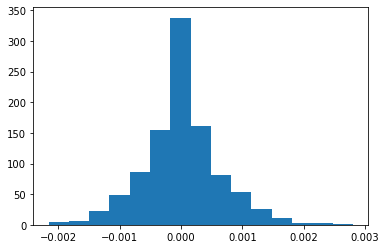

In [151]:
plt.hist(bootstrap_slopes_16, bins=15)
plt.show()

In [152]:
slope_average_16 = bootstrap_slopes_16.mean()
slope_average_16

1.5392453843624893e-05

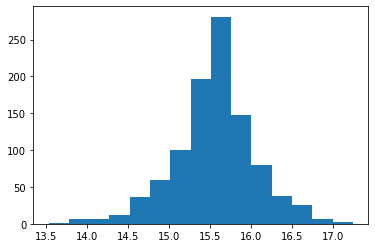

In [153]:
plt.hist(bootstrap_intercepts_16, bins=15)
plt.show()

In [154]:
intercept_average_16 = bootstrap_slopes_16.mean()
intercept_average_16

1.5392453843624893e-05

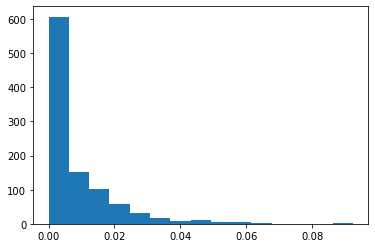

In [155]:
plt.hist(bootstrap_corr_16, bins=15)
plt.show()

In [156]:
corr_average_16 = bootstrap_corr_16.mean()
corr_average_16

0.008417495220525583

Text(10.395989583333332, 0.5, 'Diversion Rate 2010')

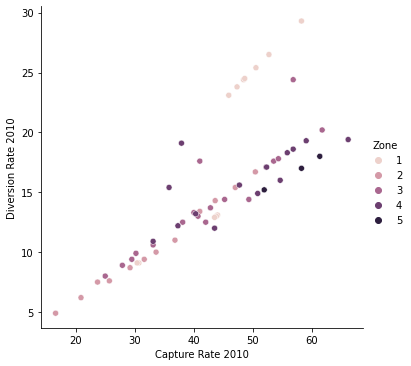

In [160]:
sns.relplot(x="Capture Rate", y="Diversion Rate", hue="Zone", data=recycling_2010);
plt.xlabel("Capture Rate 2010")
plt.ylabel("Diversion Rate 2010")

Text(11.52893229166667, 0.5, 'Diversion Rate 2016')

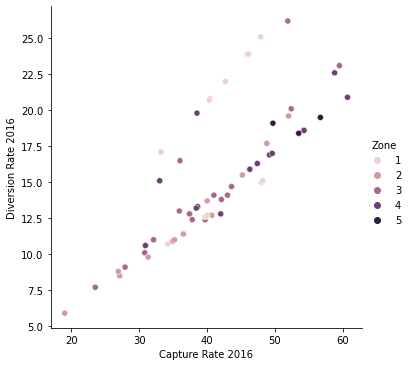

In [163]:
sns.relplot(x="Capture Rate", y="Diversion Rate", hue="Zone", data=recycling_2016);
plt.xlabel("Capture Rate 2016")
plt.ylabel("Diversion Rate 2016")

In [175]:
recycling_2010_copy = recycling_2010.copy()

## initialize a KMeans object
clustering = KMeans(n_clusters = 5, random_state = 15)

## perform the KMeans algorithm on the penguins_clean bill and flipper length data
clustering.fit(recycling_2010_copy[["Capture Rate", "Diversion Rate"]])

##finding the cluster centers
clustering.cluster_centers_

array([[51.27272727, 16.16363636],
       [28.08      ,  8.68      ],
       [40.96111111, 13.7       ],
       [59.32222222, 20.5       ],
       [48.9       , 24.61666667]])

In [176]:
recycling_2010_copy.describe()

,Unnamed: 0,Zone,Fiscal Month Number,Fiscal Year,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
count,59.000000,59.000000,59.0,59.0,59.000000,59.000000,59.000000,59.000000
mean,29.000000,2.728814,11.0,2010.0,15.030508,39.864407,50.272881,43.216949
std,17.175564,1.186570,0.0,0.0,5.440977,11.478928,15.095110,11.305341
min,0.000000,1.000000,11.0,2010.0,4.900000,16.700000,16.500000,16.600000
25%,14.500000,2.000000,11.0,2010.0,10.950000,32.200000,39.200000,34.700000
50%,29.000000,3.000000,11.0,2010.0,14.400000,41.100000,51.300000,43.600000
75%,43.500000,4.000000,11.0,2010.0,17.900000,47.650000,61.350000,52.050000
max,58.000000,5.000000,11.0,2010.0,29.300000,65.600000,79.000000,66.100000


In [177]:
cluster_labels = clustering.labels_
cluster_labels[0:5]

array([3, 4, 2, 4, 4], dtype=int32)

In [178]:
len(cluster_labels)

59

In [179]:
recycling_2010_copy['cluster_label'] = cluster_labels
recycling_2010_copy.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate,cluster_label
0,0,1,MN01,11,2010,May,29.3,54.4,70.2,58.2,3
1,1,1,MN02,11,2010,May,26.5,44.3,79.0,52.7,4
2,2,1,MN03,11,2010,May,13.1,47.5,39.5,44.0,2
3,3,1,MN04,11,2010,May,23.1,37.4,73.0,45.9,4
4,4,1,MN05,11,2010,May,23.8,41.1,66.6,47.3,4


Text(13.535850694444441, 0.5, 'Diversion Rate 2010')

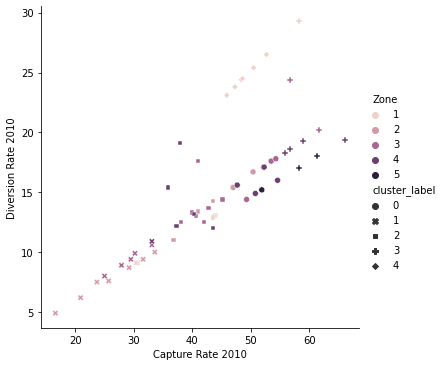

In [180]:
sns.relplot(x="Capture Rate", y="Diversion Rate", hue="Zone", style="cluster_label", data=recycling_2010_copy);
plt.xlabel("Capture Rate 2010")
plt.ylabel("Diversion Rate 2010")

In [207]:
predicted_zone_lookup = pd.DataFrame({"cluster_label": [0, 1, 2, 3, 4],
                                        "predicted_zone": [1, 2, 3, 4, 5]})
predicted_zone_lookup.head()

,cluster_label,predicted_zone
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [208]:
zone_predict = pd.merge(recycling_2010_copy, predicted_zone_lookup, on="cluster_label")
zone_predict.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate,cluster_label,predicted_zone
0,0,1,MN01,11,2010,May,29.3,54.4,70.2,58.2,3,4
1,33,3,BKS06,11,2010,May,24.4,48.5,76.5,56.8,3,4
2,35,3,BKS10,11,2010,May,20.2,61.5,61.9,61.7,3,4
3,42,4,QW01,11,2010,May,18.3,54.8,57.5,55.8,3,4
4,43,4,QW02,11,2010,May,18.6,55.0,59.7,56.8,3,4


In [209]:
total_rows = zone_predict.shape[0]
print("number of rows in zone predict data set: " + str(total_rows))

number of rows in zone predict data set: 59


In [227]:
num_correct = 0
for i in range(total_rows):
    val = zone_predict.iloc[i]['Zone'] == zone_predict.iloc[i]['predicted_zone']
    val = str(val)
    if (val == 'True'):        
        num_correct += num_correct
num_correct

0

In [215]:
zone_predict.iloc[3]['Zone'] == zone_predict.iloc[3]['predicted_zone']

True

In [216]:
type(zone_predict.iloc[3]['Zone'])

numpy.int64

In [217]:
type(zone_predict.iloc[3]['predicted_zone'])

numpy.int64

Story:
 - Ideal vs. realistic capture rate probabilities (decrease)/ difference in recycling from 2010 - 2016 (90% confidence
 - Graphs by boro (bar graphs)
 - Pollution aggregate per year vs. biking counts vs. recycling
 - Pollution 2011 vs. 2018 (train-test split to see trends/linear regression)
 - K-means by industry
 - Top 5 cities/industries for pollutors over the years

In [228]:
biking_2013_routes.to_csv('biking_2013.csv')

In [229]:
biking_2016_routes.to_csv('biking_2016.csv')